In [1]:

import random

import chess
import matplotlib.pyplot as plt
from Agent import Agent
from AgentCollection import AgentCollection
from ChessEnvironment import ChessEnvironment
from Experiment import Experiment
from plotting import plot_errors, plot_errors_scatter, plot_histograms, plot_metrics, transform_dataset, plot_errors_grouped, plot_errors_individually
from SampleConverter import SampleConverter
from stockfish import Stockfish #add to python env variables

import matplotlib.pyplot as plt
from constants import EPISODES_COOP, HIDDEN_SIZE, MAX_STEPS, PATH

from main import train_net

FILE ="03_sorted_100000.txt" 


agentCollection = AgentCollection()        
agentCollection.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1)) #Rook R
agentCollection.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1)) #Rook L
agentCollection.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1))  #Knight R
agentCollection.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1)) #Knight L 
agentCollection.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1))  #Bishop L
agentCollection.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1)) #Bishop R
agentCollection.addAgent(Agent(chess.WHITE, chess.KING, chess.E1)) #King  
agentCollection.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1)) #Queen
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2))  #Pawn 1
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2))  #Pawn 2
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2))  #Pawn 3
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2))  #Pawn 4
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2))  #Pawn 5
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2))  #Pawn 6 
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2))  #Pawn 7
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2)) #Pawn 8       

agentCollection.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agentCollection.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agentCollection.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agentCollection.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agentCollection.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agentCollection.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agentCollection.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agentCollection.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    

sampleConv = SampleConverter(agentCollection) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE )    
print("--> Read and learned from APF " + str(sampleConv.total_games) + " games <-- ")


experiment = Experiment( episodes=EPISODES_COOP,hidden_size=HIDDEN_SIZE, max_steps=MAX_STEPS)
print("--> Setting up ChessEnvironment <-- ")

for agent in agentCollection.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] #free space 
print("Example A1 dataset: ", len(agentCollection.getAgentAtStartingPosition(chess.A1).trainAPF)*3)
        
#plot_frequency_distribution([agentCollection.getAgentAtStartingPosition(chess.B1)])

env = ChessEnvironment(agentCollection, min_appear=1, experiment_conf=experiment)
print("--> Finished setting up ChessEnvironment <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern")
stockfish.set_depth(10)
stockfish.set_skill_level(5)
white_agents = agentCollection.getAgentsByColor(True)

--> Starting to read dataset <-- 
--> Read and learned from APF 592 games <-- 
--> Setting up ChessEnvironment <-- 
Example A1 dataset:  1038
--> Finished setting up ChessEnvironment <-- 


In [2]:
ROUNDS = 3
EPISODES_CNN = 3

for agent in white_agents: 
    agent.reset_training(ROUNDS)
    
for i in range(ROUNDS):
    for agent in white_agents: 
        #print(agent.starting_position)
        train_net(agent, EPISODES_CNN)
    env.play_against_bot(i, stockfish)
    print("--- Round ", str(i), " completed ---")

True 1 pre_select: 0 total options: 2 total steps:  29 checkmate:  False is_game_over False
--- Round  0  completed ---
True 1 pre_select: 0 total options: 1 total steps:  25 checkmate:  False is_game_over False
--- Round  1  completed ---
True 0 pre_select: 0 total options: 0 total steps:  37 checkmate:  True is_game_over True
--- Round  2  completed ---


In [5]:
for agent in agentCollection.allAgents: 
    agent.set_suggestions_list(30)
for i in range(30):
    env.play_against_bot(i, stockfish)

True 0 pre_select: 0 total options: 0 total steps:  37 checkmate:  True is_game_over True
True 2 pre_select: 0 total options: 3 total steps:  31 checkmate:  False is_game_over False
True 1 pre_select: 0 total options: 3 total steps:  27 checkmate:  False is_game_over False
True 9 pre_select: 0 total options: 24 total steps:  27 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 3 total steps:  33 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 4 total steps:  33 checkmate:  False is_game_over False
True 1 pre_select: 0 total options: 2 total steps:  35 checkmate:  False is_game_over False
True 3 pre_select: 0 total options: 3 total steps:  21 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 3 total steps:  25 checkmate:  False is_game_over False
True 1 pre_select: 0 total options: 1 total steps:  15 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 3 total steps:  27 checkmate:  False is_game_

In [6]:

agent_10 = AgentCollection()        
agent_10.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1)) #Rook R
agent_10.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1)) #Rook L
agent_10.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1))  #Knight R
agent_10.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1)) #Knight L 
agent_10.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1))  #Bishop L
agent_10.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1)) #Bishop R
agent_10.addAgent(Agent(chess.WHITE, chess.KING, chess.E1)) #King  
agent_10.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1)) #Queen
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2))  #Pawn 1
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2))  #Pawn 2
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2))  #Pawn 3
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2))  #Pawn 4
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2))  #Pawn 5
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2))  #Pawn 6 
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2))  #Pawn 7
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2)) #Pawn 8       

agent_10.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agent_10.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agent_10.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agent_10.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agent_10.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agent_10.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agent_10.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agent_10.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    

sampleConv = SampleConverter(agent_10) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE )    
print("--> Read and learned from APF " + str(sampleConv.total_games) + " games <-- ")


experiment = Experiment( episodes=EPISODES_COOP,hidden_size=HIDDEN_SIZE, max_steps=MAX_STEPS)
print("--> Setting up ChessEnvironment <-- ")

for agent in agent_10.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] #free space 
print("Example A1 dataset: ", len(agent_10.getAgentAtStartingPosition(chess.A1).trainAPF)*3)
        
#plot_frequency_distribution([agent_10.getAgentAtStartingPosition(chess.B1)])

env = ChessEnvironment(agent_10, min_appear=1, experiment_conf=experiment)
print("--> Finished setting up ChessEnvironment <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern")
stockfish.set_depth(10)
stockfish.set_skill_level(5)
white_agents = agent_10.getAgentsByColor(True)

ROUNDS = 10
EPISODES_CNN = 10

for agent in white_agents: 
    agent.reset_training(ROUNDS)
    
for i in range(ROUNDS):
    for agent in white_agents: 
        #print(agent.starting_position)
        train_net(agent, EPISODES_CNN)
    env.play_against_bot(i, stockfish)
    print("--- Round ", str(i), " completed ---")

--> Starting to read dataset <-- 
--> Read and learned from APF 592 games <-- 
--> Setting up ChessEnvironment <-- 
Example A1 dataset:  1038
--> Finished setting up ChessEnvironment <-- 
True 1 pre_select: 0 total options: 7 total steps:  29 checkmate:  False is_game_over False
--- Round  0  completed ---
True 2 pre_select: 0 total options: 4 total steps:  17 checkmate:  False is_game_over False
--- Round  1  completed ---
True 1 pre_select: 0 total options: 3 total steps:  11 checkmate:  False is_game_over False
--- Round  2  completed ---
True 1 pre_select: 0 total options: 4 total steps:  19 checkmate:  False is_game_over False
--- Round  3  completed ---
True 1 pre_select: 0 total options: 5 total steps:  23 checkmate:  False is_game_over False
--- Round  4  completed ---
True 2 pre_select: 0 total options: 2 total steps:  19 checkmate:  False is_game_over False
--- Round  5  completed ---
True 1 pre_select: 0 total options: 1 total steps:  25 checkmate:  False is_game_over False


In [7]:
for agent in agent_10.allAgents: 
    agent.set_suggestions_list(30)
    
for i in range(30):
    env.play_against_bot(i, stockfish)

True 1 pre_select: 0 total options: 5 total steps:  15 checkmate:  False is_game_over False
True 10 pre_select: 0 total options: 26 total steps:  21 checkmate:  False is_game_over False
True 8 pre_select: 0 total options: 29 total steps:  29 checkmate:  False is_game_over False
True 8 pre_select: 0 total options: 35 total steps:  23 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 3 total steps:  21 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 4 total steps:  27 checkmate:  False is_game_over False
True 7 pre_select: 0 total options: 18 total steps:  25 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 2 total steps:  25 checkmate:  False is_game_over False
True 1 pre_select: 0 total options: 1 total steps:  29 checkmate:  False is_game_over False
True 0 pre_select: 0 total options: 0 total steps:  25 checkmate:  True is_game_over True
True 1 pre_select: 0 total options: 2 total steps:  29 checkmate:  False is_g

In [8]:

agent_30 = AgentCollection()        
agent_30.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1)) #Rook R
agent_30.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1)) #Rook L
agent_30.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1))  #Knight R
agent_30.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1)) #Knight L 
agent_30.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1))  #Bishop L
agent_30.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1)) #Bishop R
agent_30.addAgent(Agent(chess.WHITE, chess.KING, chess.E1)) #King  
agent_30.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1)) #Queen
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2))  #Pawn 1
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2))  #Pawn 2
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2))  #Pawn 3
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2))  #Pawn 4
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2))  #Pawn 5
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2))  #Pawn 6 
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2))  #Pawn 7
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2)) #Pawn 8       

agent_30.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agent_30.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agent_30.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agent_30.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agent_30.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agent_30.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agent_30.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agent_30.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    

sampleConv = SampleConverter(agent_30) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE )    
print("--> Read and learned from APF " + str(sampleConv.total_games) + " games <-- ")


experiment = Experiment( episodes=EPISODES_COOP,hidden_size=HIDDEN_SIZE, max_steps=MAX_STEPS)
print("--> Setting up ChessEnvironment <-- ")

for agent in agent_30.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] #free space 
print("Example A1 dataset: ", len(agent_30.getAgentAtStartingPosition(chess.A1).trainAPF)*3)
        
#plot_frequency_distribution([agent_30.getAgentAtStartingPosition(chess.B1)])

env = ChessEnvironment(agent_30, min_appear=1, experiment_conf=experiment)
print("--> Finished setting up ChessEnvironment <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern")
stockfish.set_depth(10)
stockfish.set_skill_level(5)
white_agents = agent_30.getAgentsByColor(True)

ROUNDS = 30
EPISODES_CNN = 30

for agent in white_agents: 
    agent.reset_training(ROUNDS)
    
for i in range(ROUNDS):
    for agent in white_agents: 
        #print(agent.starting_position)
        train_net(agent, EPISODES_CNN)
    env.play_against_bot(i, stockfish)
    print("--- Round ", str(i), " completed ---")

--> Starting to read dataset <-- 
--> Read and learned from APF 592 games <-- 
--> Setting up ChessEnvironment <-- 
Example A1 dataset:  1038
--> Finished setting up ChessEnvironment <-- 
True 1 pre_select: 0 total options: 2 total steps:  37 checkmate:  False is_game_over False
--- Round  0  completed ---
True 1 pre_select: 0 total options: 1 total steps:  17 checkmate:  False is_game_over False
--- Round  1  completed ---
True 2 pre_select: 0 total options: 3 total steps:  27 checkmate:  False is_game_over False
--- Round  2  completed ---
True 1 pre_select: 0 total options: 3 total steps:  31 checkmate:  False is_game_over False
--- Round  3  completed ---
True 1 pre_select: 0 total options: 3 total steps:  25 checkmate:  False is_game_over False
--- Round  4  completed ---
True 0 pre_select: 0 total options: 0 total steps:  31 checkmate:  True is_game_over True
--- Round  5  completed ---
True 2 pre_select: 0 total options: 3 total steps:  27 checkmate:  False is_game_over False
--

In [9]:
for agent in agent_30.allAgents: 
    agent.set_suggestions_list(30)
    
for i in range(30):
    env.play_against_bot(i, stockfish)

True 2 pre_select: 0 total options: 3 total steps:  27 checkmate:  False is_game_over False
True 1 pre_select: 0 total options: 1 total steps:  23 checkmate:  False is_game_over False
True 9 pre_select: 0 total options: 25 total steps:  31 checkmate:  False is_game_over False
True 3 pre_select: 0 total options: 3 total steps:  13 checkmate:  False is_game_over False
True 3 pre_select: 0 total options: 3 total steps:  15 checkmate:  False is_game_over False
True 11 pre_select: 0 total options: 27 total steps:  31 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 2 total steps:  37 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 2 total steps:  15 checkmate:  False is_game_over False
True 1 pre_select: 0 total options: 2 total steps:  29 checkmate:  False is_game_over False
True 1 pre_select: 0 total options: 1 total steps:  13 checkmate:  False is_game_over False
True 1 pre_select: 0 total options: 1 total steps:  29 checkmate:  False is_g

In [10]:

agent_100 = AgentCollection()        
agent_100.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1)) #Rook R
agent_100.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1)) #Rook L
agent_100.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1))  #Knight R
agent_100.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1)) #Knight L 
agent_100.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1))  #Bishop L
agent_100.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1)) #Bishop R
agent_100.addAgent(Agent(chess.WHITE, chess.KING, chess.E1)) #King  
agent_100.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1)) #Queen
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2))  #Pawn 1
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2))  #Pawn 2
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2))  #Pawn 3
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2))  #Pawn 4
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2))  #Pawn 5
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2))  #Pawn 6 
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2))  #Pawn 7
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2)) #Pawn 8       

agent_100.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agent_100.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agent_100.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agent_100.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agent_100.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agent_100.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agent_100.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agent_100.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    

sampleConv = SampleConverter(agent_100) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE )    
print("--> Read and learned from APF " + str(sampleConv.total_games) + " games <-- ")


experiment = Experiment( episodes=EPISODES_COOP,hidden_size=HIDDEN_SIZE, max_steps=MAX_STEPS)
print("--> Setting up ChessEnvironment <-- ")

for agent in agent_100.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] #free space 
print("Example A1 dataset: ", len(agent_100.getAgentAtStartingPosition(chess.A1).trainAPF)*3)
        
#plot_frequency_distribution([agent_100.getAgentAtStartingPosition(chess.B1)])

env = ChessEnvironment(agent_100, min_appear=1, experiment_conf=experiment)
print("--> Finished setting up ChessEnvironment <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern")
stockfish.set_depth(10)
stockfish.set_skill_level(5)
white_agents = agent_100.getAgentsByColor(True)

ROUNDS = 100
EPISODES_CNN = 100

for agent in white_agents: 
    agent.reset_training(ROUNDS)
    
for i in range(ROUNDS):
    for agent in white_agents: 
        #print(agent.starting_position)
        train_net(agent, EPISODES_CNN)
    env.play_against_bot(i, stockfish)
    print("--- Round ", str(i), " completed ---")


--> Starting to read dataset <-- 
--> Read and learned from APF 592 games <-- 
--> Setting up ChessEnvironment <-- 
Example A1 dataset:  1038
--> Finished setting up ChessEnvironment <-- 
True 2 pre_select: 0 total options: 4 total steps:  13 checkmate:  False is_game_over False
--- Round  0  completed ---
True 6 pre_select: 0 total options: 26 total steps:  33 checkmate:  False is_game_over False
--- Round  1  completed ---
True 2 pre_select: 0 total options: 2 total steps:  27 checkmate:  False is_game_over False
--- Round  2  completed ---
True 0 pre_select: 0 total options: 0 total steps:  31 checkmate:  True is_game_over True
--- Round  3  completed ---
True 6 pre_select: 0 total options: 14 total steps:  37 checkmate:  False is_game_over False
--- Round  4  completed ---
True 1 pre_select: 0 total options: 1 total steps:  31 checkmate:  False is_game_over False
--- Round  5  completed ---
True 0 pre_select: 0 total options: 0 total steps:  39 checkmate:  True is_game_over True
--

In [11]:
for agent in agent_100.allAgents: 
    agent.set_suggestions_list(30)
    
for i in range(30):
    env.play_against_bot(i, stockfish)

True 11 pre_select: 0 total options: 25 total steps:  23 checkmate:  False is_game_over False
True 1 pre_select: 0 total options: 2 total steps:  23 checkmate:  False is_game_over False
True 1 pre_select: 0 total options: 2 total steps:  15 checkmate:  False is_game_over False
True 10 pre_select: 0 total options: 27 total steps:  23 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 3 total steps:  31 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 3 total steps:  23 checkmate:  False is_game_over False
True 11 pre_select: 0 total options: 21 total steps:  15 checkmate:  False is_game_over False
True 9 pre_select: 0 total options: 24 total steps:  25 checkmate:  False is_game_over False
True 11 pre_select: 0 total options: 22 total steps:  9 checkmate:  False is_game_over False
True 2 pre_select: 0 total options: 2 total steps:  25 checkmate:  False is_game_over False
True 7 pre_select: 0 total options: 15 total steps:  31 checkmate:  Fals

3.466666666666667
2.7333333333333334
6.466666666666667


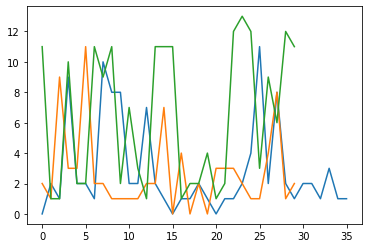

28.0
23.066666666666666
20.533333333333335


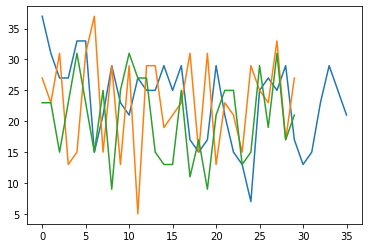

In [18]:
moveable_agents_10 = [0,2,1,9,2,2,1,10,8,8,2,2,7,2,1,0,1,1,2,1,0,1,1,2,4,11,2,8,2,1,2,2,1,3,1,1]
moveable_agents_30 = [2,1,9,3,3,11,2,2,1,1,1,1,2,2,7,0,4,0,2,0,3,3,3,2,1,1,4,8,1,2]
moveable_agents_100 = [11,1,1,10,2,2,11,9,11,2,7,3,1,11,11,11,1,2,2,4,1,2,12,13,12,3,9,6,12,11]

moves_10 = [37,31,27,27,33,33,15,21,29,23,21,27,25,25,29,25,29,17,15,17,29,21,15,13,7,25,27,25,29,17,13,15,23,29,25,21]
moves_30 = [27,23,31,13,15,31,37,15,29,13,29,5,29,29,19,21,23,31,15,31,13,23,21,15,29,25,23,33,17,27]
moves_100 = [23,23,15,23,31,23,15,25,9,25,31,27,27,15,13,13,25,11,17,9,21,25,25,13,15,29,19,31,17,21]
print(sum(moveable_agents_10)/30)
print(sum(moveable_agents_30)/30)
print(sum(moveable_agents_100)/30)

plt.plot(moveable_agents_10)
plt.plot(moveable_agents_30)
plt.plot(moveable_agents_100)
plt.show()


plt.plot(moves_10)
plt.plot(moves_30)
plt.plot(moves_100)
print(sum(moves_10)/30)
print(sum(moves_30)/30)
print(sum(moves_100)/30)
plt.show()

